In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf

In [2]:
base_hyperparameters = {
    'learning_rate': 0.001,
    'batch_size': 16,
    'epochs': 300,
    'lstm_hidden_units': 8
}

learning_rate_vals = [0.0001, 0.001, 0.01]
batch_size_vals = [16, 64, 128]
lstm_hidden_units_vals = [8, 64, 256]

dsets = {}

for batch_size in batch_size_vals:
    dsets[f'train-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/train_dset-{batch_size}',
                                                             (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                              tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'val-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/val_dset-{batch_size}',
                                                           (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                            tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'test-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/test_dset-{batch_size}',
                                                            (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                             tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

In [3]:
def run_model(hyperparameters):
    lr_str = str(hyperparameters['learning_rate'])[2:]
    hyperparameter_string = f"{lr_str}-{hyperparameters['batch_size']}-{hyperparameters['epochs']}-{hyperparameters['lstm_hidden_units']}"
    print(hyperparameter_string)

    np.random.seed(0)
    tf.random.set_seed(0)

    num_hidden_units = hyperparameters['lstm_hidden_units']
    num_outputs = 7

    model = tf.keras.Sequential([
            tf.keras.Input(shape=(300, 171)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units)),
            tf.keras.layers.Dense(num_outputs,activation='softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    train_dset = dsets[f"train-{hyperparameters['batch_size']}"]
    val_dset = dsets[f"val-{hyperparameters['batch_size']}"]
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)
    history = model.fit(train_dset,epochs=hyperparameters['epochs'],validation_data = val_dset,callbacks=[es])
    model.save(f"../models/model-{hyperparameter_string}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.title("Loss Over Epoch")
    plt.xlabel("Loss")
    plt.ylabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Validation")
    plt.title("Accuracy Over Epoch")
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.legend()
    plt.show()
    plt.savefig(f"../models/loss-accuracy-{hyperparameter_string}.png")

    plt.close()

def test_hyperparameters():
    for learning_rate in learning_rate_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['learning_rate'] = learning_rate
        run_model(hyperparameters)

    for batch_size in batch_size_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['batch_size'] = batch_size
        run_model(hyperparameters)

    for lstm_hidden_units in lstm_hidden_units_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['lstm_hidden_units'] = lstm_hidden_units
        run_model(hyperparameters)

0001-16-300-8
Epoch 1/300
100/100 [==============================] - 24s 245ms/step - loss: 1.9631 - accuracy: 0.1238 - val_loss: 1.9397 - val_accuracy: 0.1400
Epoch 2/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9384 - accuracy: 0.1456 - val_loss: 1.9315 - val_accuracy: 0.1700
Epoch 3/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9310 - accuracy: 0.1600 - val_loss: 1.9267 - val_accuracy: 0.1650
Epoch 4/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9264 - accuracy: 0.1644 - val_loss: 1.9243 - val_accuracy: 0.1600
Epoch 5/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9207 - accuracy: 0.1663 - val_loss: 1.9222 - val_accuracy: 0.1450
Epoch 6/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9218 - accuracy: 0.1631 - val_loss: 1.9225 - val_accuracy: 0.1500
Epoch 7/300
100/100 [==============================] - 23s 231ms/step - loss: 1.9185 - accuracy: 0.1669 - val_

Epoch 57/300
100/100 [==============================] - 23s 232ms/step - loss: 1.7507 - accuracy: 0.2862 - val_loss: 1.7678 - val_accuracy: 0.2700
Epoch 58/300
100/100 [==============================] - 23s 233ms/step - loss: 1.7312 - accuracy: 0.2969 - val_loss: 1.7304 - val_accuracy: 0.3400
Epoch 59/300
100/100 [==============================] - 23s 233ms/step - loss: 1.7240 - accuracy: 0.3088 - val_loss: 1.7149 - val_accuracy: 0.3250
Epoch 60/300
100/100 [==============================] - 23s 232ms/step - loss: 1.6959 - accuracy: 0.3300 - val_loss: 1.6719 - val_accuracy: 0.3550
Epoch 61/300
100/100 [==============================] - 23s 232ms/step - loss: 1.6766 - accuracy: 0.3450 - val_loss: 1.6683 - val_accuracy: 0.3450
Epoch 62/300
100/100 [==============================] - 23s 232ms/step - loss: 1.7790 - accuracy: 0.2988 - val_loss: 1.8739 - val_accuracy: 0.2200
Epoch 63/300
100/100 [==============================] - 23s 232ms/step - loss: 1.7593 - accuracy: 0.3119 - val_loss: 1

100/100 [==============================] - 23s 232ms/step - loss: 1.9078 - accuracy: 0.2100 - val_loss: 1.8967 - val_accuracy: 0.1800
Epoch 113/300
100/100 [==============================] - 23s 232ms/step - loss: 1.8943 - accuracy: 0.2163 - val_loss: 1.8823 - val_accuracy: 0.2200
Epoch 114/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9034 - accuracy: 0.2044 - val_loss: 1.9819 - val_accuracy: 0.1300
Epoch 115/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9191 - accuracy: 0.1719 - val_loss: 1.8717 - val_accuracy: 0.2100
Epoch 116/300
100/100 [==============================] - 23s 232ms/step - loss: 1.8783 - accuracy: 0.2100 - val_loss: 1.8618 - val_accuracy: 0.2350
Epoch 117/300
100/100 [==============================] - 23s 232ms/step - loss: 1.8684 - accuracy: 0.2113 - val_loss: 1.8479 - val_accuracy: 0.2200
Epoch 118/300
100/100 [==============================] - 23s 232ms/step - loss: 1.8325 - accuracy: 0.2256 - val_loss: 1.8662 -

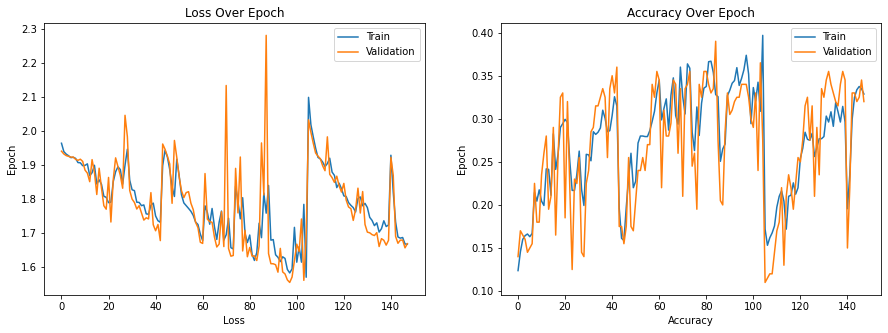

001-16-300-8
Epoch 1/300
100/100 [==============================] - 24s 245ms/step - loss: 1.9542 - accuracy: 0.1375 - val_loss: 1.9414 - val_accuracy: 0.1850
Epoch 2/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9398 - accuracy: 0.1669 - val_loss: 1.9444 - val_accuracy: 0.1250
Epoch 3/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9356 - accuracy: 0.1644 - val_loss: 1.9262 - val_accuracy: 0.1500
Epoch 4/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9263 - accuracy: 0.1713 - val_loss: 1.9265 - val_accuracy: 0.1300
Epoch 5/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9215 - accuracy: 0.1762 - val_loss: 1.9463 - val_accuracy: 0.1200
Epoch 6/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9171 - accuracy: 0.1875 - val_loss: 1.9476 - val_accuracy: 0.1150
Epoch 7/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9251 - accuracy: 0.1869 - val_l

Epoch 57/300
100/100 [==============================] - 23s 233ms/step - loss: 1.5024 - accuracy: 0.4006 - val_loss: 1.7397 - val_accuracy: 0.2750
Epoch 58/300
100/100 [==============================] - 23s 232ms/step - loss: 1.4831 - accuracy: 0.4025 - val_loss: 1.4532 - val_accuracy: 0.4350
Epoch 59/300
100/100 [==============================] - 23s 232ms/step - loss: 1.4666 - accuracy: 0.4256 - val_loss: 1.5005 - val_accuracy: 0.4250
Epoch 60/300
100/100 [==============================] - 23s 232ms/step - loss: 1.4865 - accuracy: 0.3862 - val_loss: 1.4447 - val_accuracy: 0.4150
Epoch 61/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4821 - accuracy: 0.4112 - val_loss: 1.9559 - val_accuracy: 0.2250
Epoch 62/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4503 - accuracy: 0.4169 - val_loss: 1.4215 - val_accuracy: 0.4050
Epoch 63/300
100/100 [==============================] - 23s 233ms/step - loss: 1.7451 - accuracy: 0.2919 - val_loss: 1

100/100 [==============================] - 23s 232ms/step - loss: 1.3229 - accuracy: 0.4938 - val_loss: 1.5168 - val_accuracy: 0.3900
Epoch 113/300
100/100 [==============================] - 23s 233ms/step - loss: 1.3284 - accuracy: 0.4869 - val_loss: 1.3736 - val_accuracy: 0.4250
Epoch 114/300
100/100 [==============================] - 23s 232ms/step - loss: 1.3998 - accuracy: 0.4600 - val_loss: 1.3886 - val_accuracy: 0.3950
Epoch 115/300
100/100 [==============================] - 23s 233ms/step - loss: 1.2943 - accuracy: 0.5106 - val_loss: 1.3782 - val_accuracy: 0.4350
Epoch 116/300
100/100 [==============================] - 23s 233ms/step - loss: 1.2546 - accuracy: 0.5331 - val_loss: 1.3400 - val_accuracy: 0.4500
Epoch 117/300
100/100 [==============================] - 23s 232ms/step - loss: 1.2506 - accuracy: 0.5319 - val_loss: 1.3931 - val_accuracy: 0.4600
Epoch 118/300
100/100 [==============================] - 23s 233ms/step - loss: 1.2226 - accuracy: 0.5394 - val_loss: 1.3216 -

100/100 [==============================] - 23s 233ms/step - loss: 1.4937 - accuracy: 0.4494 - val_loss: 1.5617 - val_accuracy: 0.3200
Epoch 168/300
100/100 [==============================] - 23s 232ms/step - loss: 1.3529 - accuracy: 0.4631 - val_loss: 1.4422 - val_accuracy: 0.3900
Epoch 169/300
100/100 [==============================] - 23s 231ms/step - loss: 1.2334 - accuracy: 0.5375 - val_loss: 1.3513 - val_accuracy: 0.4900
Epoch 170/300
100/100 [==============================] - 23s 232ms/step - loss: 1.1268 - accuracy: 0.5838 - val_loss: 1.2678 - val_accuracy: 0.5050
Epoch 171/300
100/100 [==============================] - 23s 231ms/step - loss: 1.0892 - accuracy: 0.5938 - val_loss: 1.2018 - val_accuracy: 0.5750
Epoch 172/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0852 - accuracy: 0.5944 - val_loss: 1.2012 - val_accuracy: 0.5600
Epoch 173/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0597 - accuracy: 0.6062 - val_loss: 1.2627 -

100/100 [==============================] - 23s 232ms/step - loss: 1.1489 - accuracy: 0.5750 - val_loss: 1.3150 - val_accuracy: 0.4750
Epoch 223/300
100/100 [==============================] - 23s 232ms/step - loss: 1.1382 - accuracy: 0.5794 - val_loss: 1.2810 - val_accuracy: 0.4850
Epoch 224/300
100/100 [==============================] - 23s 232ms/step - loss: 1.1145 - accuracy: 0.5775 - val_loss: 1.2565 - val_accuracy: 0.5250
Epoch 225/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0948 - accuracy: 0.5869 - val_loss: 1.2317 - val_accuracy: 0.5150
Epoch 226/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0854 - accuracy: 0.5981 - val_loss: 1.2368 - val_accuracy: 0.5250
Epoch 227/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0714 - accuracy: 0.6100 - val_loss: 1.2300 - val_accuracy: 0.5450
Epoch 228/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0281 - accuracy: 0.6175 - val_loss: 1.2070 -

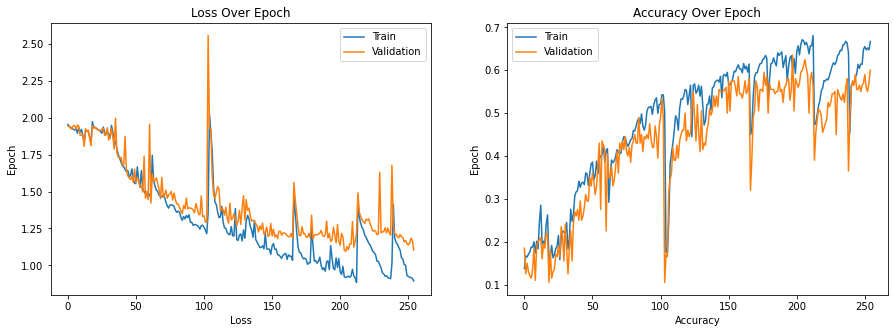

01-16-300-8
Epoch 1/300
100/100 [==============================] - 25s 247ms/step - loss: 1.9623 - accuracy: 0.1450 - val_loss: 1.9626 - val_accuracy: 0.1050
Epoch 2/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9492 - accuracy: 0.1425 - val_loss: 1.9577 - val_accuracy: 0.1050
Epoch 3/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9479 - accuracy: 0.1519 - val_loss: 1.9524 - val_accuracy: 0.1050
Epoch 4/300
100/100 [==============================] - 23s 234ms/step - loss: 1.9388 - accuracy: 0.1550 - val_loss: 1.9333 - val_accuracy: 0.1200
Epoch 11/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9381 - accuracy: 0.1581 - val_loss: 1.9362 - val_accuracy: 0.1800
Epoch 12/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9365 - accuracy: 0.1575 - val_loss: 1.9302 - val_accuracy: 0.1200
Epoch 13/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9366 - accuracy: 0.1594 - val

Epoch 63/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9449 - accuracy: 0.1500 - val_loss: 1.9411 - val_accuracy: 0.1050
Epoch 64/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9448 - accuracy: 0.1500 - val_loss: 1.9408 - val_accuracy: 0.1050
Epoch 65/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9448 - accuracy: 0.1506 - val_loss: 1.9406 - val_accuracy: 0.1050
Epoch 66/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9447 - accuracy: 0.1519 - val_loss: 1.9404 - val_accuracy: 0.1050
Epoch 67/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9446 - accuracy: 0.1513 - val_loss: 1.9402 - val_accuracy: 0.1050
Epoch 68/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9446 - accuracy: 0.1488 - val_loss: 1.9400 - val_accuracy: 0.1050
Epoch 69/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9445 - accuracy: 0.1469 - val_loss: 1

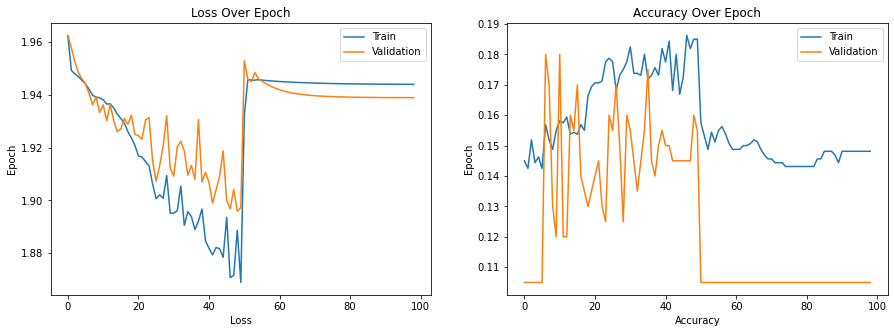

001-16-300-8
Epoch 1/300
100/100 [==============================] - 25s 245ms/step - loss: 1.9542 - accuracy: 0.1375 - val_loss: 1.9414 - val_accuracy: 0.1850
Epoch 2/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9398 - accuracy: 0.1669 - val_loss: 1.9444 - val_accuracy: 0.1250
Epoch 3/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9356 - accuracy: 0.1644 - val_loss: 1.9262 - val_accuracy: 0.1500
Epoch 4/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9263 - accuracy: 0.1713 - val_loss: 1.9265 - val_accuracy: 0.1300
Epoch 5/300
100/100 [==============================] - 23s 233ms/step - loss: 1.9215 - accuracy: 0.1762 - val_loss: 1.9463 - val_accuracy: 0.1200
Epoch 6/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9171 - accuracy: 0.1875 - val_loss: 1.9476 - val_accuracy: 0.1150
Epoch 7/300
100/100 [==============================] - 23s 232ms/step - loss: 1.9251 - accuracy: 0.1869 - val_l

Epoch 57/300
100/100 [==============================] - 23s 232ms/step - loss: 1.5024 - accuracy: 0.4006 - val_loss: 1.7397 - val_accuracy: 0.2750
Epoch 58/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4831 - accuracy: 0.4025 - val_loss: 1.4532 - val_accuracy: 0.4350
Epoch 59/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4666 - accuracy: 0.4256 - val_loss: 1.5005 - val_accuracy: 0.4250
Epoch 60/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4865 - accuracy: 0.3862 - val_loss: 1.4447 - val_accuracy: 0.4150
Epoch 61/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4821 - accuracy: 0.4112 - val_loss: 1.9559 - val_accuracy: 0.2250
Epoch 62/300
100/100 [==============================] - 23s 233ms/step - loss: 1.4503 - accuracy: 0.4169 - val_loss: 1.4215 - val_accuracy: 0.4050
Epoch 63/300
100/100 [==============================] - 23s 232ms/step - loss: 1.7451 - accuracy: 0.2919 - val_loss: 1

100/100 [==============================] - 23s 233ms/step - loss: 1.3229 - accuracy: 0.4938 - val_loss: 1.5168 - val_accuracy: 0.3900
Epoch 113/300
100/100 [==============================] - 23s 233ms/step - loss: 1.3284 - accuracy: 0.4869 - val_loss: 1.3736 - val_accuracy: 0.4250
Epoch 114/300
100/100 [==============================] - 23s 233ms/step - loss: 1.3998 - accuracy: 0.4600 - val_loss: 1.3886 - val_accuracy: 0.3950
Epoch 115/300
100/100 [==============================] - 23s 233ms/step - loss: 1.2943 - accuracy: 0.5106 - val_loss: 1.3782 - val_accuracy: 0.4350
Epoch 116/300
100/100 [==============================] - 23s 233ms/step - loss: 1.2546 - accuracy: 0.5331 - val_loss: 1.3400 - val_accuracy: 0.4500
Epoch 117/300
100/100 [==============================] - 23s 233ms/step - loss: 1.2506 - accuracy: 0.5319 - val_loss: 1.3931 - val_accuracy: 0.4600
Epoch 118/300
100/100 [==============================] - 23s 232ms/step - loss: 1.2226 - accuracy: 0.5394 - val_loss: 1.3216 -

100/100 [==============================] - 23s 232ms/step - loss: 1.4937 - accuracy: 0.4494 - val_loss: 1.5617 - val_accuracy: 0.3200
Epoch 168/300
100/100 [==============================] - 23s 233ms/step - loss: 1.3529 - accuracy: 0.4631 - val_loss: 1.4422 - val_accuracy: 0.3900
Epoch 169/300
100/100 [==============================] - 23s 232ms/step - loss: 1.2334 - accuracy: 0.5375 - val_loss: 1.3513 - val_accuracy: 0.4900
Epoch 170/300
100/100 [==============================] - 23s 232ms/step - loss: 1.1268 - accuracy: 0.5838 - val_loss: 1.2678 - val_accuracy: 0.5050
Epoch 171/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0892 - accuracy: 0.5938 - val_loss: 1.2018 - val_accuracy: 0.5750
Epoch 172/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0852 - accuracy: 0.5944 - val_loss: 1.2012 - val_accuracy: 0.5600
Epoch 173/300
100/100 [==============================] - 23s 232ms/step - loss: 1.0597 - accuracy: 0.6062 - val_loss: 1.2627 -

KeyboardInterrupt: 

In [4]:
test_hyperparameters()

In [11]:
base_hyperparameters = {
    'learning_rate': 0.001,
    'batch_size': 16,
    'epochs': 300,
    'lstm_hidden_units': 8
}

# learning_rate_vals = [0.0001, 0.001, 0.01]
batch_size_vals = [64, 128]
lstm_hidden_units_vals = [8, 64, 256]

dsets = {}

for batch_size in batch_size_vals:
    dsets[f'train-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/train_dset-{batch_size}',
                                                             (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                              tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'val-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/val_dset-{batch_size}',
                                                           (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                            tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'test-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/test_dset-{batch_size}',
                                                            (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                             tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

In [12]:
def run_model(hyperparameters):
    lr_str = str(hyperparameters['learning_rate'])[2:]
    hyperparameter_string = f"{lr_str}-{hyperparameters['batch_size']}-{hyperparameters['epochs']}-{hyperparameters['lstm_hidden_units']}"
    print(hyperparameter_string)

    np.random.seed(0)
    tf.random.set_seed(0)

    num_hidden_units = hyperparameters['lstm_hidden_units']
    num_outputs = 7

    model = tf.keras.Sequential([
            tf.keras.Input(shape=(300, 171)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units)),
            tf.keras.layers.Dense(num_outputs,activation='softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    train_dset = dsets[f"train-{hyperparameters['batch_size']}"]
    val_dset = dsets[f"val-{hyperparameters['batch_size']}"]
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)
    history = model.fit(train_dset,epochs=hyperparameters['epochs'],validation_data = val_dset,callbacks=[es])
    model.save(f"../models/model-{hyperparameter_string}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.title("Loss Over Epoch")
    plt.xlabel("Loss")
    plt.ylabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Validation")
    plt.title("Accuracy Over Epoch")
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.legend()
    plt.show()
    plt.savefig(f"../models/loss-accuracy-{hyperparameter_string}.png")

    plt.close()

def test_hyperparameters():
#     for learning_rate in learning_rate_vals:
#         hyperparameters = copy.deepcopy(base_hyperparameters)
#         hyperparameters['learning_rate'] = learning_rate
#         run_model(hyperparameters)

    for batch_size in batch_size_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['batch_size'] = batch_size
        run_model(hyperparameters)

    for lstm_hidden_units in lstm_hidden_units_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['lstm_hidden_units'] = lstm_hidden_units
        run_model(hyperparameters)

001-64-300-8
Epoch 1/300
25/25 [==============================] - 9s 342ms/step - loss: 1.9535 - accuracy: 0.1506 - val_loss: 1.9225 - val_accuracy: 0.2000
Epoch 2/300
25/25 [==============================] - 6s 249ms/step - loss: 1.9334 - accuracy: 0.1737 - val_loss: 1.9159 - val_accuracy: 0.2300
Epoch 3/300
25/25 [==============================] - 6s 245ms/step - loss: 1.9271 - accuracy: 0.1650 - val_loss: 1.9112 - val_accuracy: 0.2400
Epoch 4/300
25/25 [==============================] - 6s 247ms/step - loss: 1.9216 - accuracy: 0.1838 - val_loss: 1.9176 - val_accuracy: 0.2050
Epoch 5/300
25/25 [==============================] - 6s 246ms/step - loss: 1.9176 - accuracy: 0.1950 - val_loss: 1.9122 - val_accuracy: 0.2000
Epoch 6/300
25/25 [==============================] - 6s 244ms/step - loss: 1.9067 - accuracy: 0.2256 - val_loss: 1.8801 - val_accuracy: 0.2050
Epoch 7/300
25/25 [==============================] - 6s 246ms/step - loss: 1.8798 - accuracy: 0.2262 - val_loss: 1.8533 - val_acc

Epoch 58/300
25/25 [==============================] - 6s 247ms/step - loss: 1.6656 - accuracy: 0.3431 - val_loss: 1.6748 - val_accuracy: 0.3200
Epoch 59/300
25/25 [==============================] - 6s 245ms/step - loss: 1.6490 - accuracy: 0.3438 - val_loss: 1.6318 - val_accuracy: 0.3100
Epoch 60/300
25/25 [==============================] - 6s 247ms/step - loss: 1.6438 - accuracy: 0.3481 - val_loss: 1.6967 - val_accuracy: 0.3350
Epoch 61/300
25/25 [==============================] - 6s 247ms/step - loss: 1.6334 - accuracy: 0.3456 - val_loss: 1.6058 - val_accuracy: 0.3500
Epoch 62/300
25/25 [==============================] - 6s 248ms/step - loss: 1.6246 - accuracy: 0.3587 - val_loss: 1.6976 - val_accuracy: 0.3350
Epoch 63/300
25/25 [==============================] - 6s 248ms/step - loss: 1.6245 - accuracy: 0.3562 - val_loss: 1.5873 - val_accuracy: 0.3600
Epoch 64/300
25/25 [==============================] - 6s 248ms/step - loss: 1.5860 - accuracy: 0.3644 - val_loss: 1.5744 - val_accuracy:

Epoch 115/300
25/25 [==============================] - 6s 247ms/step - loss: 1.4032 - accuracy: 0.4200 - val_loss: 1.4569 - val_accuracy: 0.3850
Epoch 116/300
25/25 [==============================] - 6s 248ms/step - loss: 1.3740 - accuracy: 0.4444 - val_loss: 1.4737 - val_accuracy: 0.4000
Epoch 117/300
25/25 [==============================] - 6s 248ms/step - loss: 1.3738 - accuracy: 0.4512 - val_loss: 1.4299 - val_accuracy: 0.4000
Epoch 118/300
25/25 [==============================] - 6s 249ms/step - loss: 1.3759 - accuracy: 0.4525 - val_loss: 1.4259 - val_accuracy: 0.3750
Epoch 119/300
25/25 [==============================] - 6s 248ms/step - loss: 1.3629 - accuracy: 0.4512 - val_loss: 1.4672 - val_accuracy: 0.4050
Epoch 120/300
25/25 [==============================] - 6s 248ms/step - loss: 1.3632 - accuracy: 0.4519 - val_loss: 1.4565 - val_accuracy: 0.3900
Epoch 121/300
25/25 [==============================] - 6s 246ms/step - loss: 1.3477 - accuracy: 0.4712 - val_loss: 1.4293 - val_ac

25/25 [==============================] - 6s 250ms/step - loss: 2.1030 - accuracy: 0.2006 - val_loss: 2.1602 - val_accuracy: 0.1800
Epoch 172/300
25/25 [==============================] - 6s 247ms/step - loss: 2.1462 - accuracy: 0.1525 - val_loss: 1.9942 - val_accuracy: 0.2050
Epoch 173/300
25/25 [==============================] - 6s 247ms/step - loss: 1.9882 - accuracy: 0.1587 - val_loss: 1.9361 - val_accuracy: 0.1050
Epoch 174/300
25/25 [==============================] - 6s 248ms/step - loss: 1.9413 - accuracy: 0.1494 - val_loss: 1.9345 - val_accuracy: 0.1650
Epoch 00174: early stopping
INFO:tensorflow:Assets written to: ../models/model-001-64-300-8/assets


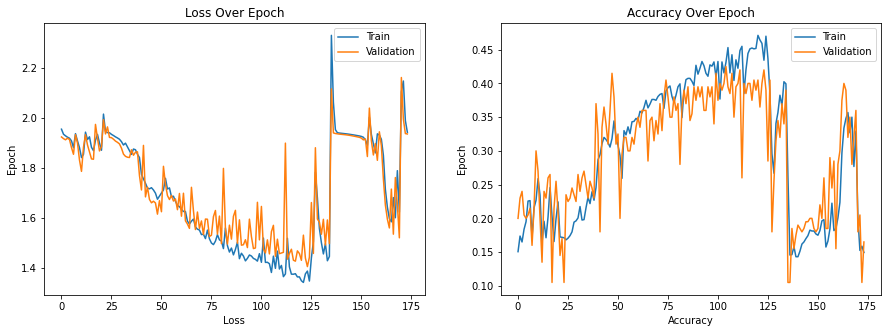

001-128-300-8
Epoch 1/300
13/13 [==============================] - 8s 651ms/step - loss: 1.9607 - accuracy: 0.1531 - val_loss: 1.9448 - val_accuracy: 0.1750
Epoch 2/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9349 - accuracy: 0.1631 - val_loss: 1.9215 - val_accuracy: 0.2300
Epoch 3/300
13/13 [==============================] - 3s 261ms/step - loss: 1.9285 - accuracy: 0.1600 - val_loss: 1.9192 - val_accuracy: 0.1600
Epoch 4/300
13/13 [==============================] - 3s 260ms/step - loss: 1.9248 - accuracy: 0.1744 - val_loss: 1.9182 - val_accuracy: 0.1600
Epoch 5/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9163 - accuracy: 0.1869 - val_loss: 1.9062 - val_accuracy: 0.1900
Epoch 6/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9098 - accuracy: 0.2050 - val_loss: 1.9023 - val_accuracy: 0.1900
Epoch 7/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9169 - accuracy: 0.1944 - val_loss: 1.9014 - val_ac

Epoch 58/300
13/13 [==============================] - 3s 263ms/step - loss: 1.9373 - accuracy: 0.1469 - val_loss: 1.9264 - val_accuracy: 0.1800
Epoch 59/300
13/13 [==============================] - 3s 263ms/step - loss: 1.9365 - accuracy: 0.1481 - val_loss: 1.9271 - val_accuracy: 0.1800
Epoch 60/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9359 - accuracy: 0.1494 - val_loss: 1.9268 - val_accuracy: 0.1850
Epoch 61/300
13/13 [==============================] - 3s 260ms/step - loss: 1.9353 - accuracy: 0.1594 - val_loss: 1.9261 - val_accuracy: 0.1800
Epoch 62/300
13/13 [==============================] - 3s 261ms/step - loss: 1.9347 - accuracy: 0.1663 - val_loss: 1.9253 - val_accuracy: 0.1900
Epoch 63/300
13/13 [==============================] - 3s 262ms/step - loss: 1.9341 - accuracy: 0.1700 - val_loss: 1.9244 - val_accuracy: 0.2000
Epoch 64/300
13/13 [==============================] - 3s 264ms/step - loss: 1.9335 - accuracy: 0.1694 - val_loss: 1.9234 - val_accuracy:

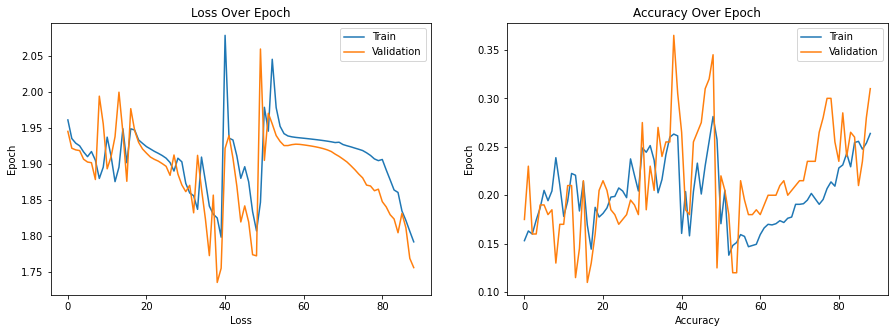

001-16-300-8


KeyError: 'train-16'

In [13]:
test_hyperparameters()

In [19]:
base_hyperparameters = {
    'learning_rate': 0.001,
    'batch_size': 16,
    'epochs': 300,
    'lstm_hidden_units': 8
}

# learning_rate_vals = [0.0001, 0.001, 0.01]
batch_size_vals = [16]
lstm_hidden_units_vals = [64, 256]

dsets = {}

for batch_size in batch_size_vals:
    dsets[f'train-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/train_dset-{batch_size}',
                                                             (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                              tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'val-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/val_dset-{batch_size}',
                                                           (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                            tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

    dsets[f'test-{batch_size}'] = tf.data.experimental.load(f'../data/dsets/test_dset-{batch_size}',
                                                            (tf.TensorSpec(shape=(None, 300, 171), dtype=tf.float64, name=None),
                                                             tf.TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)))

In [20]:
def run_model(hyperparameters):
    lr_str = str(hyperparameters['learning_rate'])[2:]
    hyperparameter_string = f"{lr_str}-{hyperparameters['batch_size']}-{hyperparameters['epochs']}-{hyperparameters['lstm_hidden_units']}"
    print(hyperparameter_string)

    np.random.seed(0)
    tf.random.set_seed(0)

    num_hidden_units = hyperparameters['lstm_hidden_units']
    num_outputs = 7

    model = tf.keras.Sequential([
            tf.keras.Input(shape=(300, 171)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units,return_sequences=True)),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(num_hidden_units)),
            tf.keras.layers.Dense(num_outputs,activation='softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=hyperparameters['learning_rate'])
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    train_dset = dsets[f"train-{hyperparameters['batch_size']}"]
    val_dset = dsets[f"val-{hyperparameters['batch_size']}"]
    es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=50, verbose=1)
    history = model.fit(train_dset,epochs=hyperparameters['epochs'],validation_data = val_dset,callbacks=[es])
    model.save(f"../models/model-{hyperparameter_string}")

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label="Train")
    plt.plot(history.history['val_loss'], label="Validation")
    plt.title("Loss Over Epoch")
    plt.xlabel("Loss")
    plt.ylabel("Epoch")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label="Train")
    plt.plot(history.history['val_accuracy'], label="Validation")
    plt.title("Accuracy Over Epoch")
    plt.xlabel("Accuracy")
    plt.ylabel("Epoch")
    plt.legend()
    plt.show()
    plt.savefig(f"../models/loss-accuracy-{hyperparameter_string}.png")

    plt.close()

def test_hyperparameters():
#     for learning_rate in learning_rate_vals:
#         hyperparameters = copy.deepcopy(base_hyperparameters)
#         hyperparameters['learning_rate'] = learning_rate
#         run_model(hyperparameters)

#     for batch_size in batch_size_vals:
#         hyperparameters = copy.deepcopy(base_hyperparameters)
#         hyperparameters['batch_size'] = batch_size
#         run_model(hyperparameters)

    for lstm_hidden_units in lstm_hidden_units_vals:
        hyperparameters = copy.deepcopy(base_hyperparameters)
        hyperparameters['lstm_hidden_units'] = lstm_hidden_units
        run_model(hyperparameters)

In [ ]:
test_hyperparameters()

001-16-300-64
Epoch 1/300
100/100 [==============================] - 26s 261ms/step - loss: 1.9636 - accuracy: 0.1663 - val_loss: 1.9686 - val_accuracy: 0.1150
Epoch 2/300
100/100 [==============================] - 25s 249ms/step - loss: 1.9314 - accuracy: 0.1694 - val_loss: 1.9448 - val_accuracy: 0.1100
Epoch 3/300
100/100 [==============================] - 25s 250ms/step - loss: 1.9322 - accuracy: 0.1838 - val_loss: 1.9361 - val_accuracy: 0.1600
Epoch 4/300
100/100 [==============================] - 25s 249ms/step - loss: 1.9085 - accuracy: 0.1900 - val_loss: 1.9071 - val_accuracy: 0.1550
Epoch 5/300
100/100 [==============================] - 25s 249ms/step - loss: 1.8611 - accuracy: 0.2344 - val_loss: 1.8382 - val_accuracy: 0.2000
Epoch 6/300
100/100 [==============================] - 25s 249ms/step - loss: 1.8045 - accuracy: 0.2562 - val_loss: 1.7820 - val_accuracy: 0.2050
Epoch 7/300
100/100 [==============================] - 25s 249ms/step - loss: 1.8855 - accuracy: 0.2212 - val_